In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import seaborn as sns

In [2]:
df=pd.read_csv('D:\Download\missing_value_free.csv')
df = df.drop(columns = ["Unnamed: 0"])
df

,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Storage Type,OS,Weight,Price
0,MSI,Intel Core i7 13620H,26454.0,GeForce RTX 2050,7320.0,15.6,1920.0,1080.0,16384.0,2097152.0,SSD,Windows 11,3.03,1529.00
1,Dell,Intel Core i7 1360P,19333.0,Intel Iris Pro Graphics 6200,1449.0,16.0,1920.0,1200.0,24576.0,1048576.0,SSD,Windows 10,2.47,1079.00
2,Dell,Intel Core i7 10700 2.90GHz,16550.0,Intel Arc A730M,8274.0,15.6,1920.0,1200.0,32768.0,1048576.0,SSD,Windows 10,1.92,1907.00
3,Asus,AMD Ryzen 9 7945HX,55651.0,GeForce RTX 4070,26876.0,17.3,2560.0,1400.0,16384.0,1048576.0,SSD,Windows 11,2.68,1959.99
4,Lenovo,AMD Ryzen 9 6900HX,24887.0,GeForce RTX 3070,22459.0,16.0,2560.0,1600.0,16384.0,1048576.0,SSD,Windows 11,2.62,1499.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,HP,Intel Core Duo L2300 1.50GHz,387.0,Intel UHD Graphics,1476.0,15.6,1366.0,768.0,8192.0,262144.0,SSD,ChromeOS,1.73,299.00
2898,HP,Intel Core i7 1355U,15287.0,Intel Iris Pro Graphics 6200,1449.0,15.6,1920.0,1080.0,49152.0,2097152.0,SSD,Windows 11,1.82,1129.99
2899,HP,Intel Celeron N4020 1.10GHz,1556.0,Intel UHD Graphics,1476.0,14.0,1366.0,768.0,4096.0,1024000.0,SSD,Windows 11,1.45,197.00
2900,Lenovo,Intel Core i7 11390H 3.40GHz,10329.0,GeForce RTX 2050,7320.0,16.0,1920.0,1200.0,16384.0,524288.0,SSD,Windows 10,1.45,1289.00


C:\Users\VU TUAN MINH\AppData\Local\Temp\ipykernel_4136\3617851401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_data = df.corr(method='pearson')


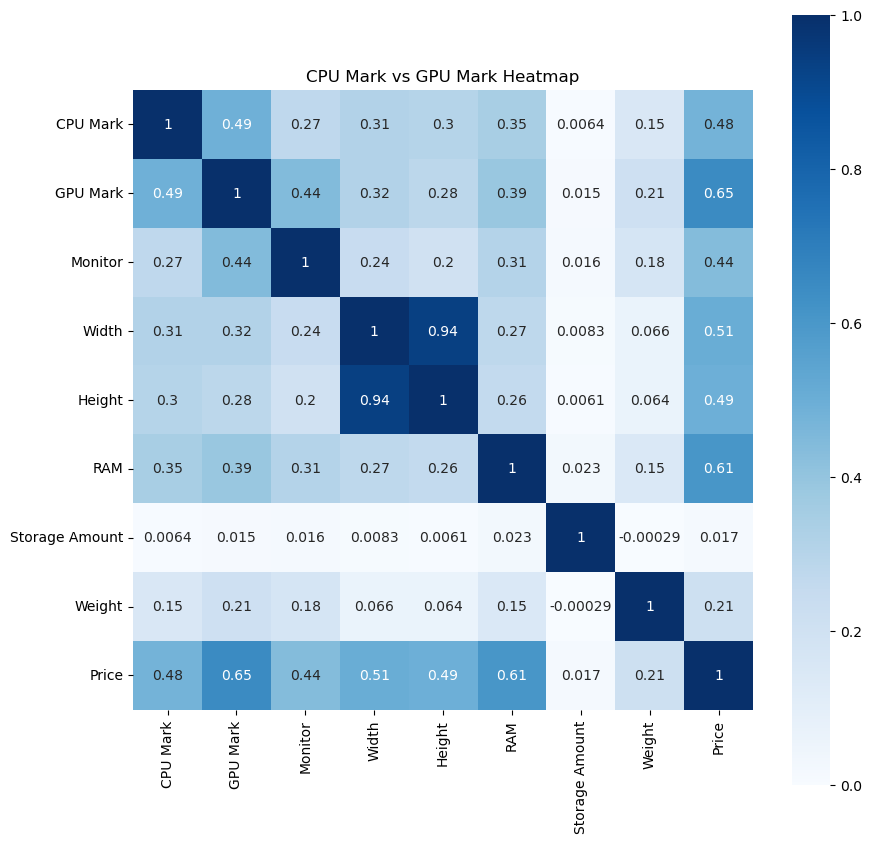

In [3]:
plt.figure(figsize=(10,10))
heatmap_data = df.corr(method='pearson')

sns.heatmap(heatmap_data,vmax=1,square=True,annot=True,cmap='Blues');
plt.title('CPU Mark vs GPU Mark Heatmap')
plt.show()

The heatmap shows the relationship between two random variables of our laptop data. In the context of laptop price prediction, the price has a strong relationship with GPU Mark and RAM. To conclude, we focus on depicting the relationship of price and the 2 catergories. 

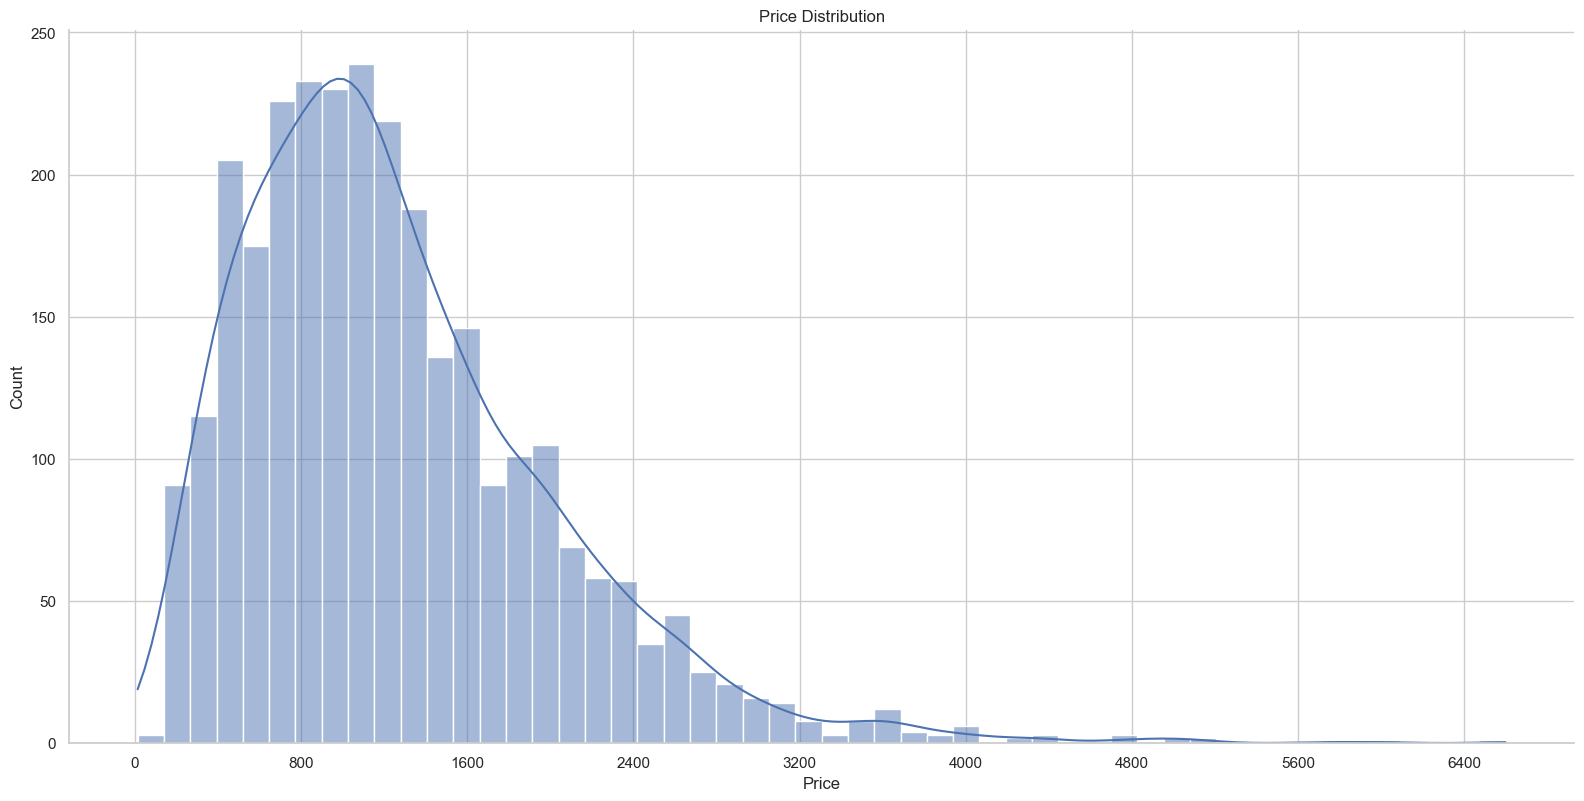

In [29]:
sns.displot(data=df, x="Price", kde=True, height=8, aspect=2)
plt.xticks(np.arange(0, df['Price'].max(), 800));
plt.title('Price Distribution');


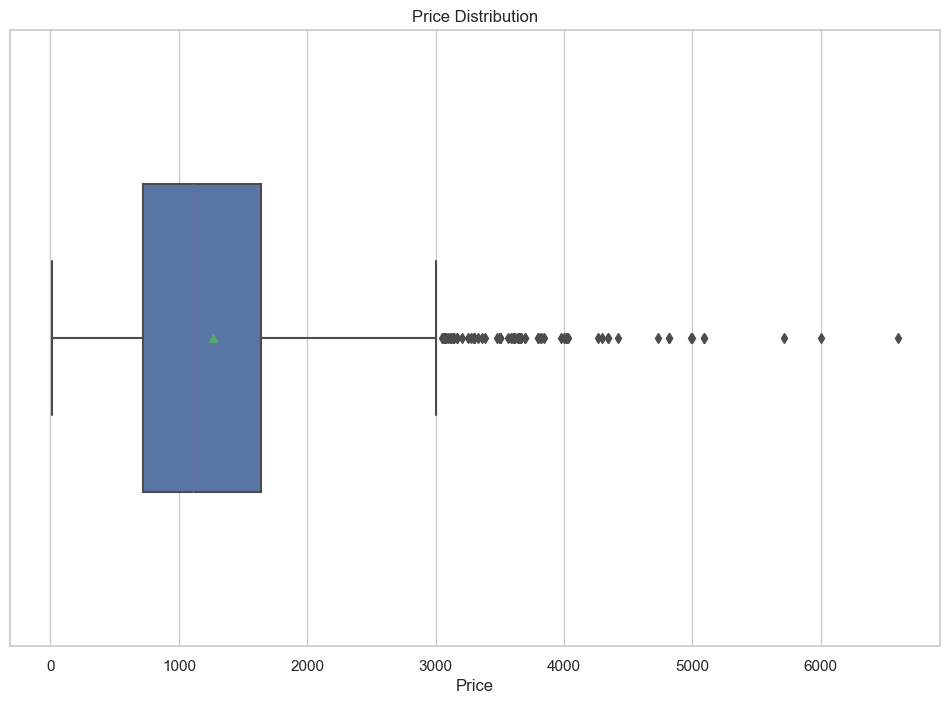

In [31]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df, x='Price',  width=0.5,showmeans=True, medianprops={"color": "r", "linewidth": 0.8})
plt.title('Price Distribution')
plt.show()

The bar charts shows the price distribution of laptop datasets. 50 percent of laptops has price in range of 750 and 1750 USD, however, the price of laptops ranges between 0 and over 6000. All laptops have price over 3000 is considered as outliers.

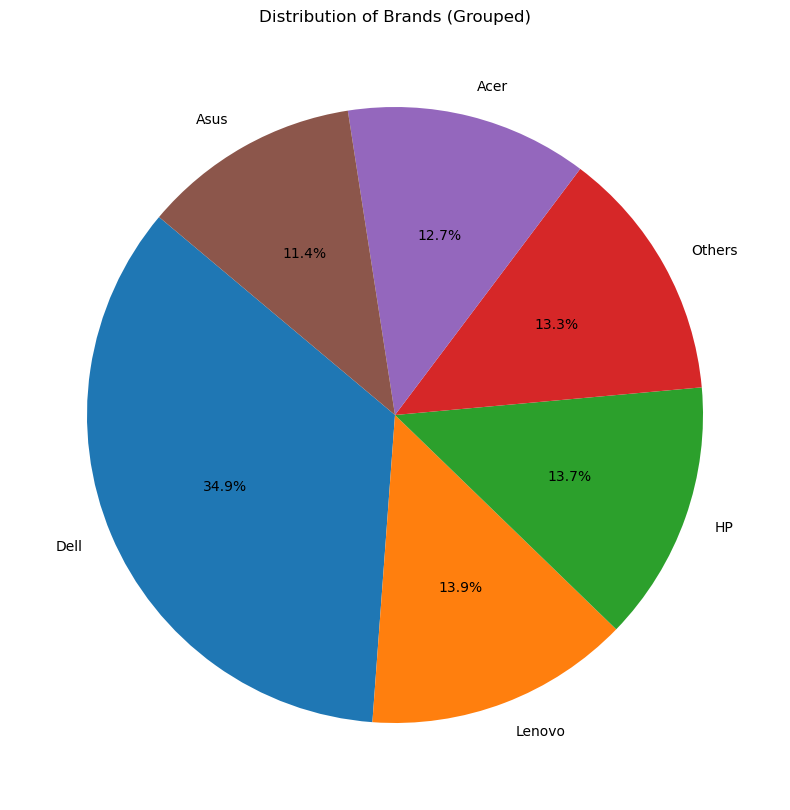

In [5]:
brand_counts = df['Brand'].value_counts()

# Calculate the percentage
brand_percentages = brand_counts / len(df) * 100

# Identify brands with less than 10% and group them as 'Other'
threshold = 10
brands_to_group = brand_percentages[brand_percentages < threshold].index
df['Brand'] = df['Brand'].apply(lambda x: 'Others' if x in brands_to_group else x)

# Recalculate the counts after grouping
grouped_brand_counts = df['Brand'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.pie(grouped_brand_counts, labels=grouped_brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands (Grouped)')
plt.show()


We can see that the data contains 5 popular brands, known as: Dell, Lenovo, HP, Dell, Asus, and Acer. A third of laptop dataset is Dell laptops, while all others take an account of over 10 percent each. 

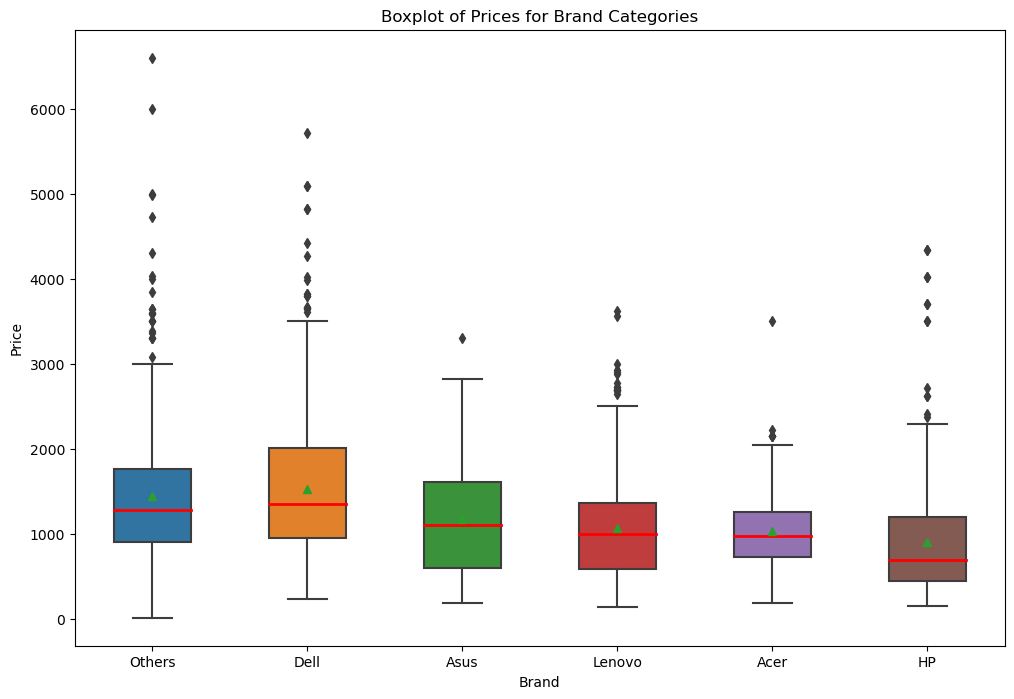

In [6]:
# Create a boxplot based on the modified categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df, x='Brand', y='Price', width=0.5, showmeans=True, medianprops={"color": "r", "linewidth": 2})
plt.title('Boxplot of Prices for Brand Categories')
plt.show()

The laptop dataset was mainly distributed from 1000 to 2000 USD, each brand. However, the price Dell laptops (mostly ranging from 1000 to 2000) higher than those of others. Moreover, the price of HP and Acer Laptops range under 1000 USD. 

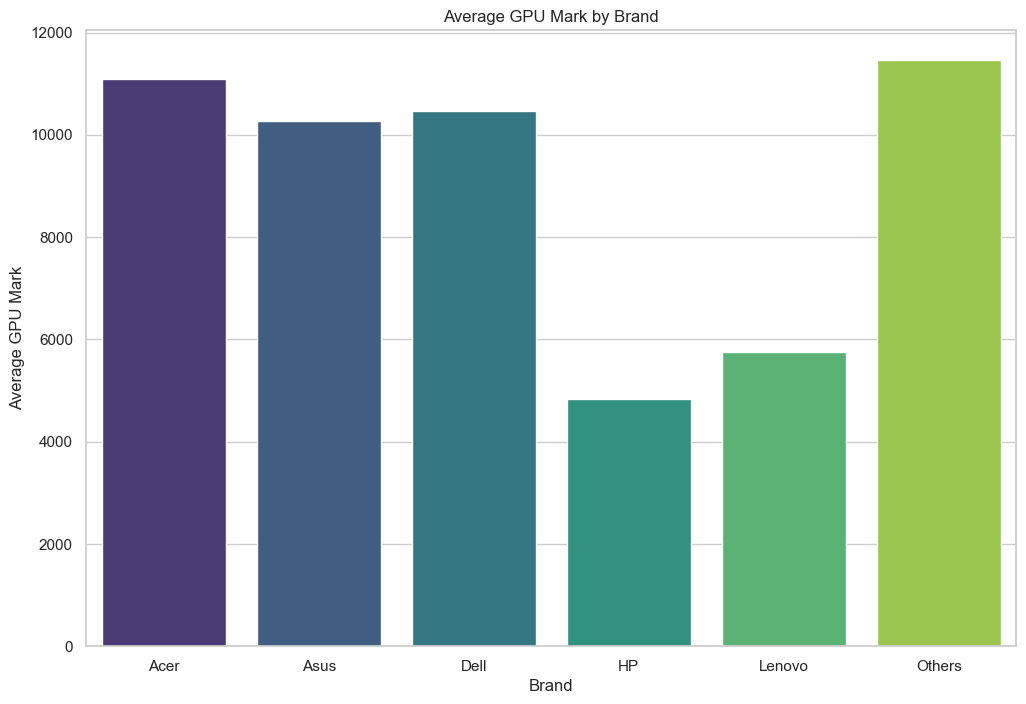

In [7]:
# Assuming df is your DataFrame

# Group by Brand and calculate the mean of GPU Mark and Price
brand_summary = df.groupby('Brand').agg({'GPU Mark': 'mean', 'Price': 'mean'}).reset_index()

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='GPU Mark', data=brand_summary, palette="viridis")
plt.title('Average GPU Mark by Brand')
plt.xlabel('Brand')
plt.ylabel('Average GPU Mark')
plt.show()


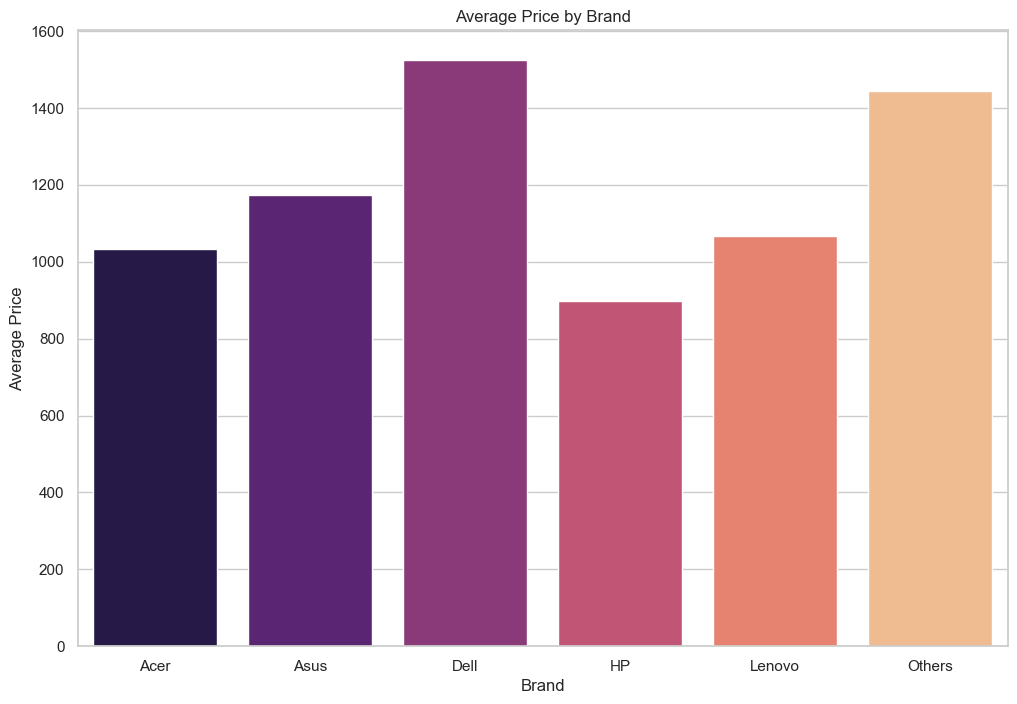

In [8]:
# Create another bar chart for Price
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='Price', data=brand_summary, palette="magma")
plt.title('Average Price by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Price')
plt.show()

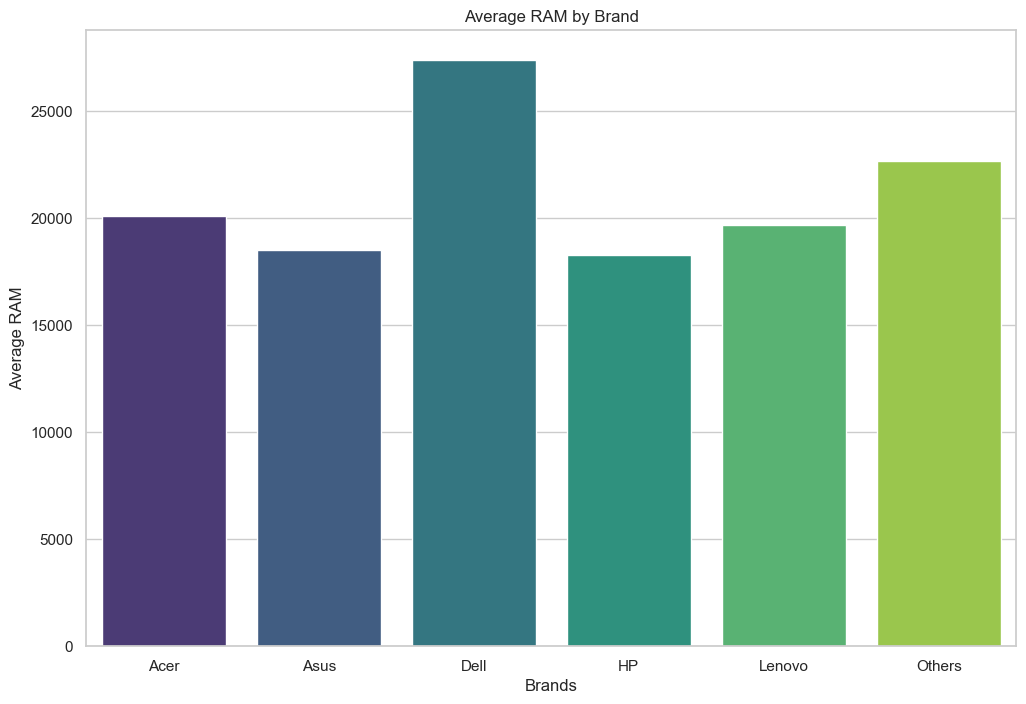

In [12]:
# Assuming df is your DataFrame

# Group by Brand and calculate the mean of GPU Mark and Price
brand_summary = df.groupby('Brand').agg({'RAM': 'mean', 'Price': 'mean'}).reset_index()

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='RAM', data=brand_summary, palette="viridis")
plt.title('Average RAM by Brand')
plt.xlabel('Brands')
plt.ylabel('Average RAM')
plt.show()


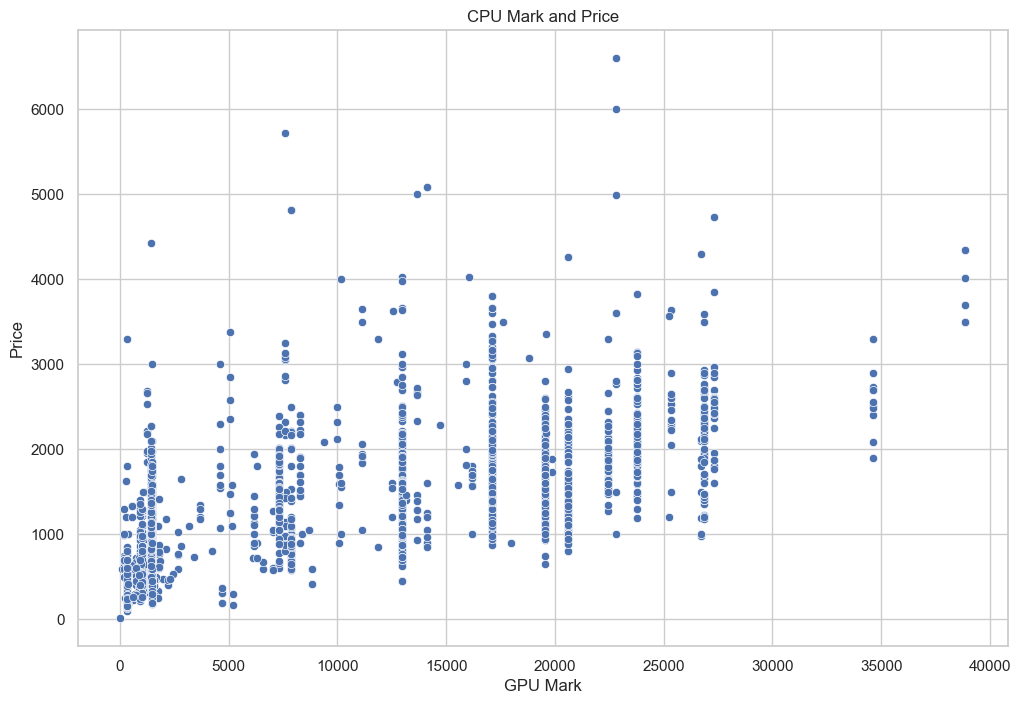

In [16]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GPU Mark', y='Price', data=df)
plt.title('CPU Mark and Price')
plt.xlabel('GPU Mark')
plt.ylabel('Price')
plt.show()

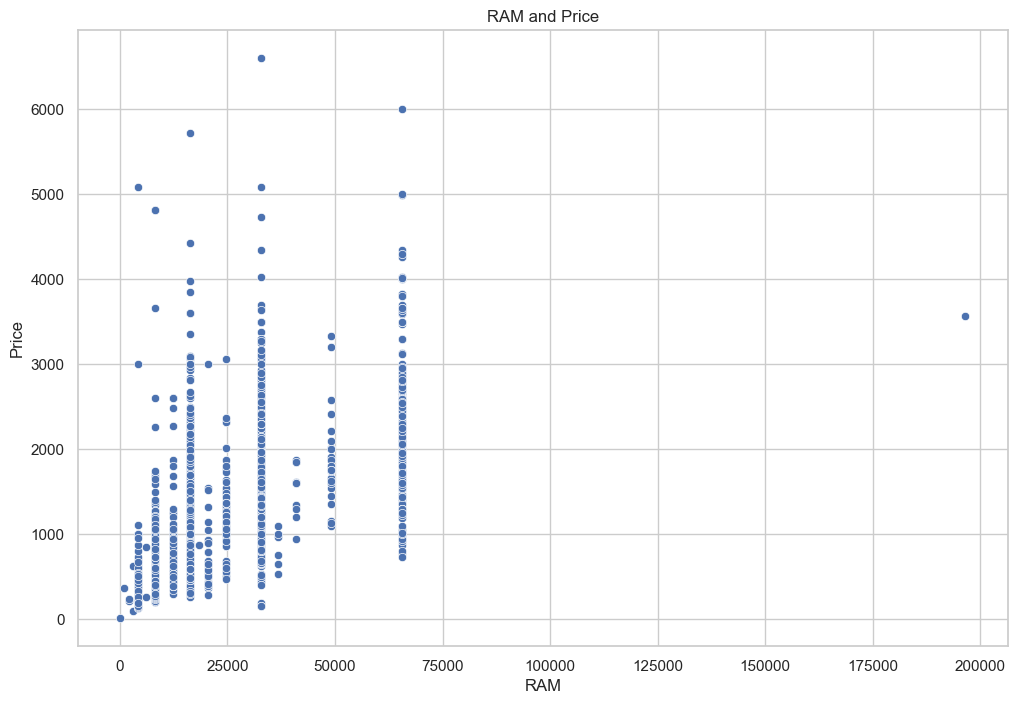

In [18]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='RAM', y='Price', data=df)
plt.title('RAM and Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()